In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
sns.set(rc={'figure.figsize':(20,8),
           'legend.markerscale': 5})
sns.set_style('whitegrid')

In [182]:
season_colors = {'Summer': sns.color_palette()[1], 'Winter': sns.color_palette()[0]}


In [188]:
START_YEAR = 1945
END_YEAR = 2018

In [189]:
df_athletes = pd.read_csv('../data/athletes.csv')
df_athletes = df_athletes[(df_athletes['Year'] > START_YEAR) & (df_athletes['Year'] < END_YEAR)]
df_athletes.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [190]:
df_hosts = pd.read_csv('../data/hosts.csv')
df_hosts = df_hosts[(df_hosts['Year'] > START_YEAR) & (df_hosts['Year'] < END_YEAR)]
df_hosts.head(5)

,City,Country,Continent,Summer,Winter,Year,Opening Ceremony,Closing Ceremony
19,St. Moritz,Switzerland,Europe,-,V,1948,January 30,February 8
20,London,United Kingdom,Europe,XIV,-,1948,July 29,August 14
21,Oslo,Norway,Europe,-,VI,1952,February 14,February 25
22,Helsinki,Finland,Europe,XV,-,1952,July 19,August 3
23,Cortina d'Ampezzo,Italy,Europe,-,VII,1956,January 26,February 5


In [191]:
df_nocs = pd.read_csv('../data/nocs.csv')
df_nocs.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [192]:
df_athletes_by_year = df_athletes.groupby(['Year', 'Season']).count().reset_index()

<AxesSubplot:xlabel='Year', ylabel='ID'>

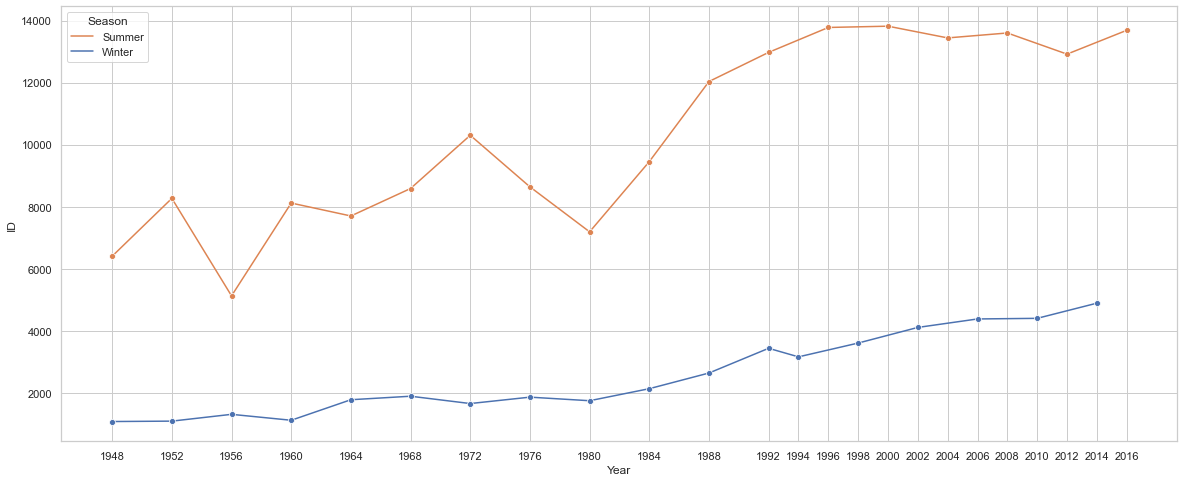

In [193]:
g = sns.lineplot(data=df_athletes_by_year, x="Year", y="ID", hue="Season", marker='o', palette=season_colors)
g.set_xticks(df_athletes_by_year['Year'].unique())
g

In [194]:
df_hosts[df_hosts['Year'].isin([1956, 1972, 1980, 1992, 1994, 2016])]

,City,Country,Continent,Summer,Winter,Year,Opening Ceremony,Closing Ceremony
23,Cortina d'Ampezzo,Italy,Europe,-,VII,1956,January 26,February 5
24,Melbourne,Australia,Oceania,XVI,-,1956,November 22,December 8
31,Sapporo,Japan,Asia,-,XI,1972,February 3,February 13
32,Munich,West Germany,Europe,XX,-,1972,August 26,September 11
35,Lake Placid,United States,North America,-,XIII,1980,February 12,February 24
36,Moscow,Soviet Union,Europe,XXII,-,1980,July 19,August 3
41,Albertville,France,Europe,-,XVI,1992,February 8,February 23
42,Barcelona,Spain,Europe,XXV,-,1992,July 25,August 9
43,Lillehammer,Norway,Europe,-,XVII,1994,February 12,February 27
54,Rio de Janeiro,Brazil,South America,XXXI,-,2016,August 5,August 21


<AxesSubplot:xlabel='Year', ylabel='ID'>

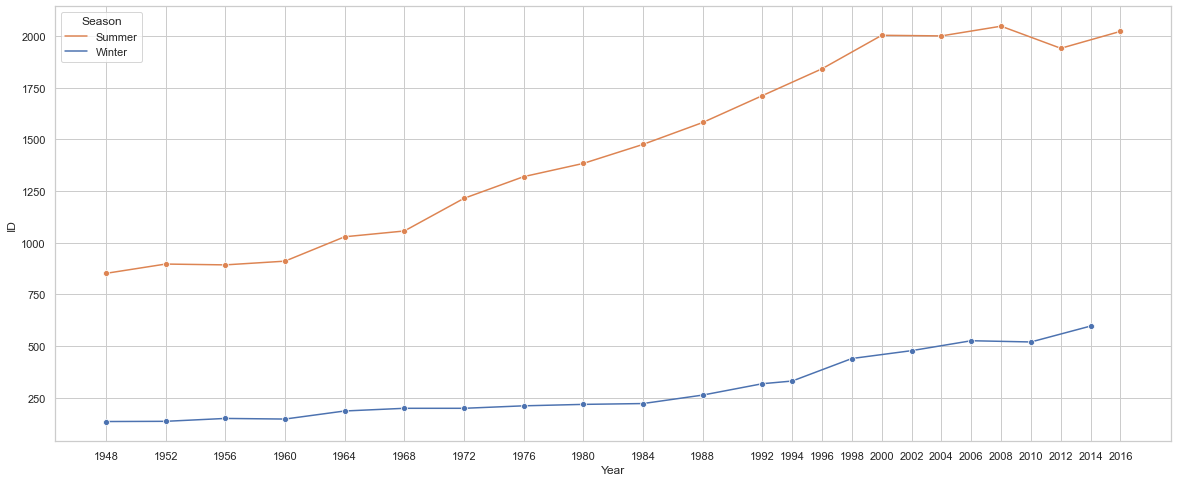

In [199]:
df_medals_by_year = df_athletes.dropna(subset=['Medal']).groupby(['Year', 'Season']).count().reset_index()
g = sns.lineplot(data=df_medals_by_year, x="Year", y="ID", hue="Season", marker='o', palette=season_colors)
g.set_xticks(df_athletes_by_year['Year'].unique())
g

In [195]:
df_hosts['Country'].value_counts()

United States     5
Japan             3
Italy             3
Canada            3
Australia         2
United Kingdom    2
France            2
Norway            2
Austria           2
Brazil            1
West Germany      1
China             1
Russia            1
Switzerland       1
South Korea       1
Finland           1
Mexico            1
Soviet Union      1
Spain             1
Yugoslavia        1
Greece            1
Name: Country, dtype: int64

    Year      Country        City Summer Winter
19  1948  Switzerland  St. Moritz      -      V
['SUI']


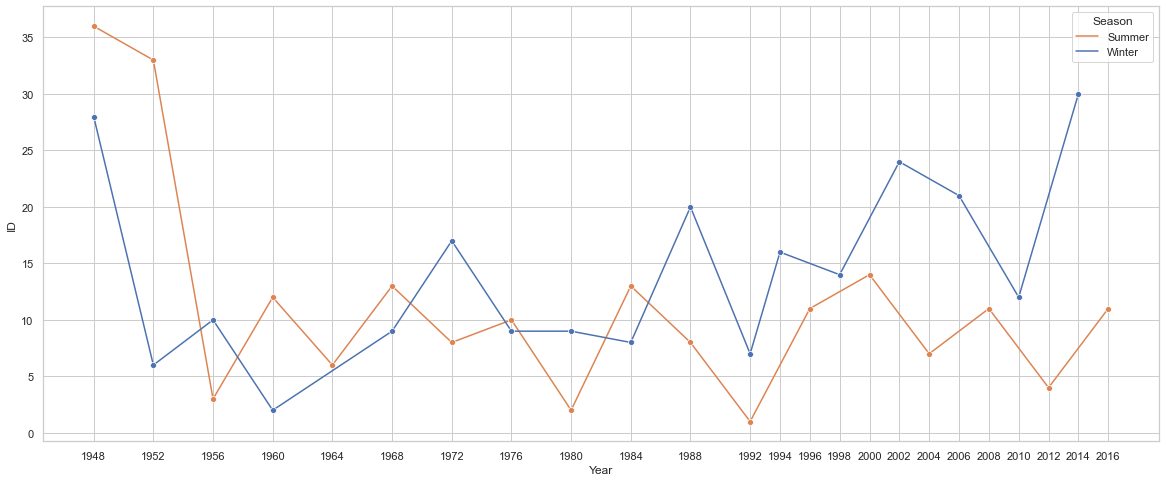

    Year         Country    City Summer Winter
20  1948  United Kingdom  London    XIV      -
52  2012  United Kingdom  London    XXX      -
['GBR']


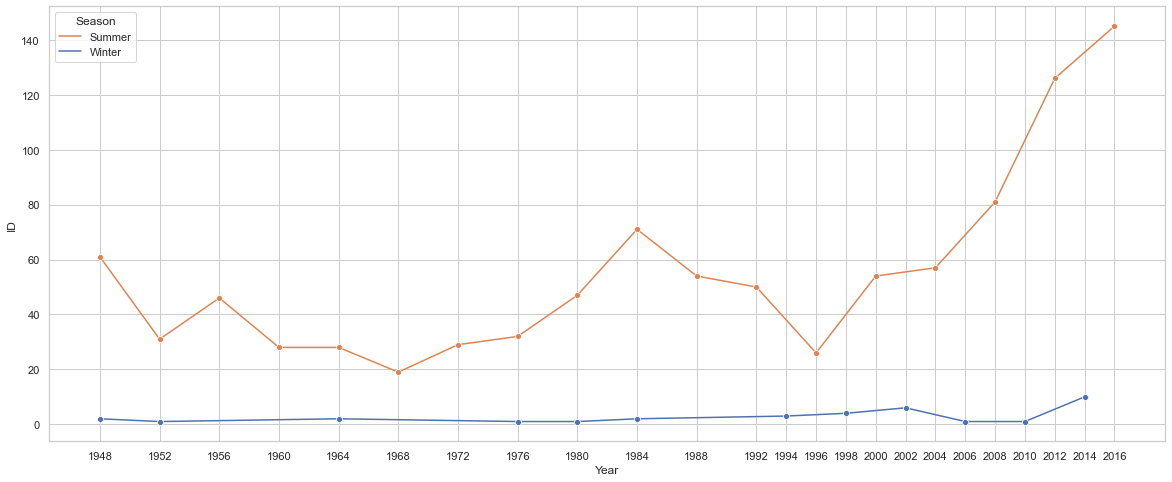

    Year Country         City Summer Winter
21  1952  Norway         Oslo      -     VI
43  1994  Norway  Lillehammer      -   XVII
['NOR']


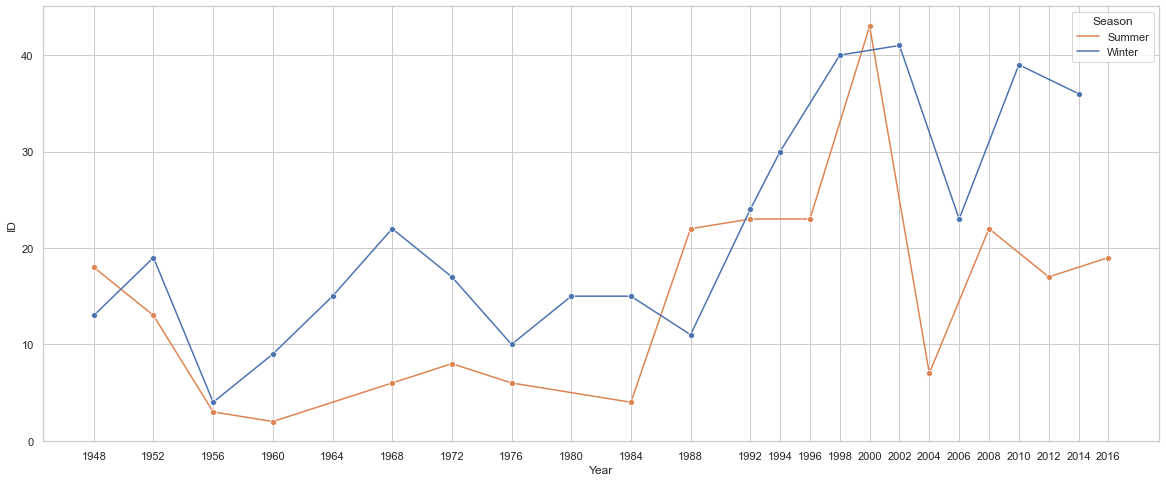

    Year  Country      City Summer Winter
22  1952  Finland  Helsinki     XV      -
['FIN']


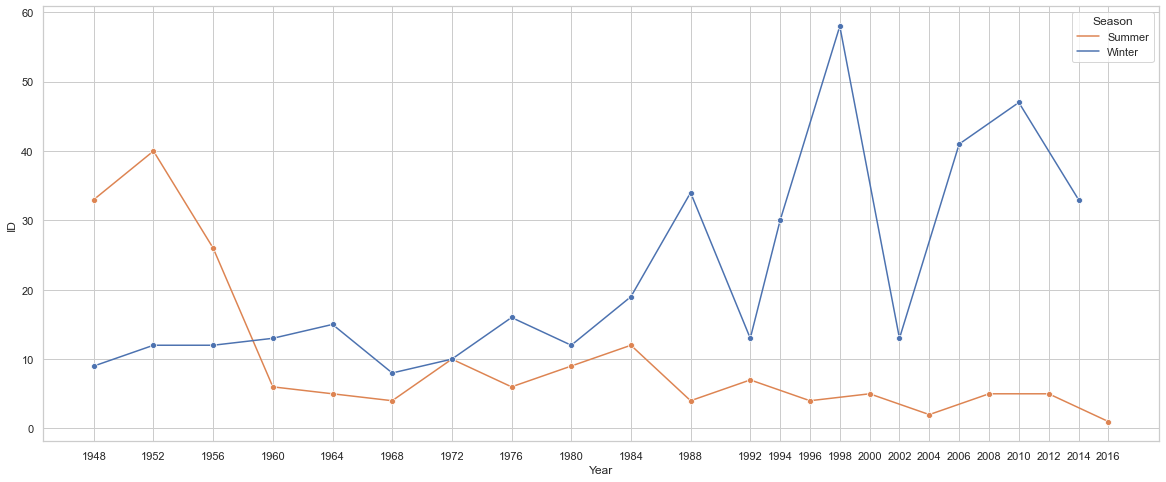

    Year Country               City Summer Winter
23  1956   Italy  Cortina d'Ampezzo      -    VII
26  1960   Italy               Rome   XVII      -
49  2006   Italy              Turin      -     XX
['ITA']


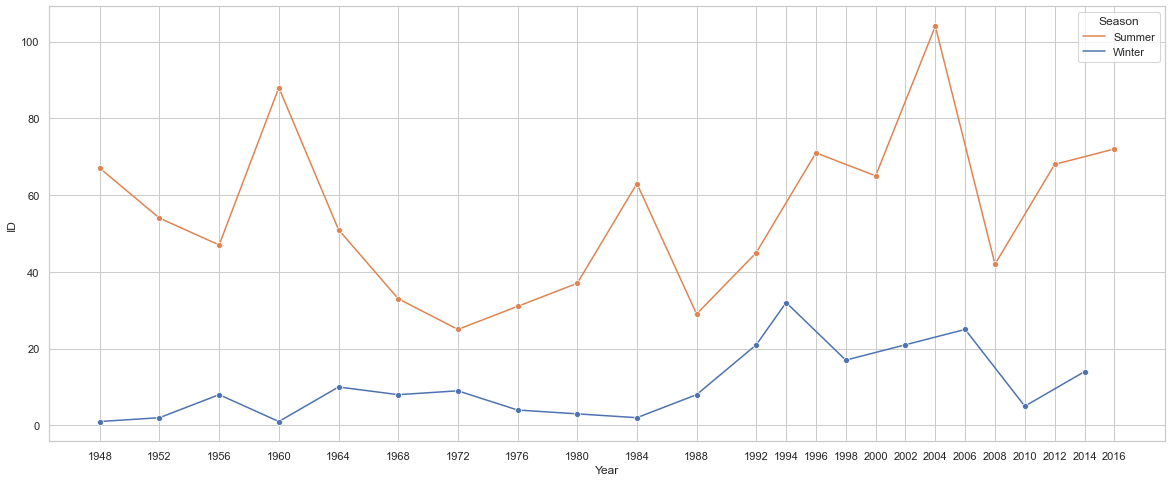

    Year    Country       City Summer Winter
24  1956  Australia  Melbourne    XVI      -
46  2000  Australia     Sydney  XXVII      -
['ANZ' 'AUS']


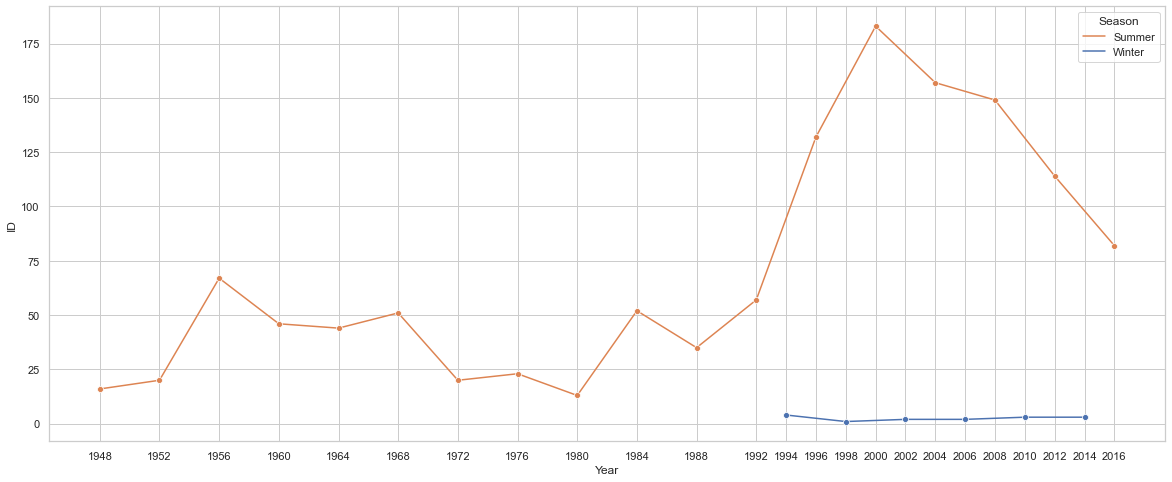

    Year        Country            City Summer Winter
25  1960  United States    Squaw Valley      -   VIII
35  1980  United States     Lake Placid      -   XIII
38  1984  United States     Los Angeles  XXIII      -
44  1996  United States         Atlanta   XXVI      -
47  2002  United States  Salt Lake City      -    XIX
['USA']


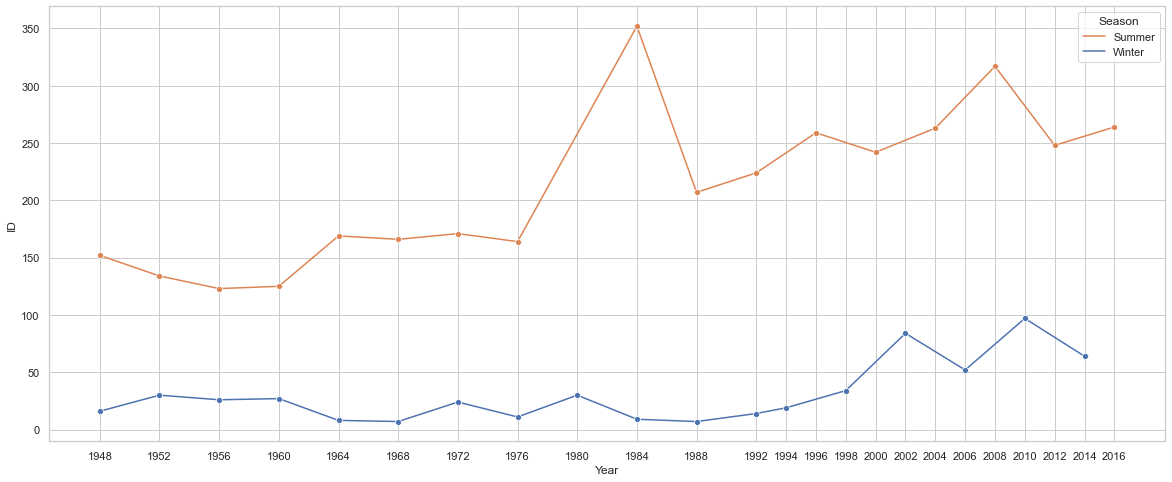

    Year  Country       City Summer Winter
27  1964  Austria  Innsbruck      -     IX
33  1976  Austria  Innsbruck      -    XII
['AUT']


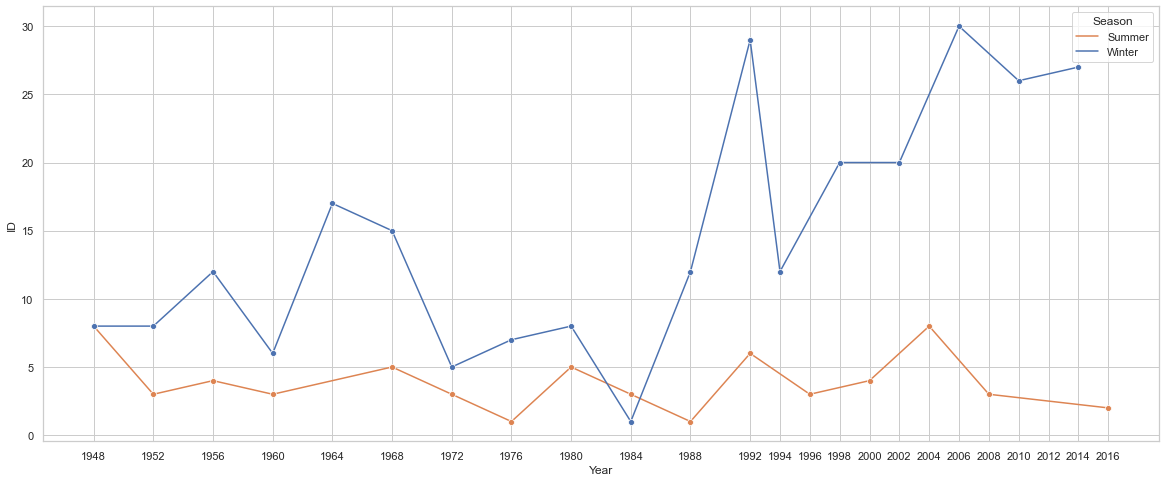

    Year Country     City Summer Winter
28  1964   Japan    Tokyo  XVIII      -
31  1972   Japan  Sapporo      -     XI
45  1998   Japan   Nagano      -  XVIII
['JPN']


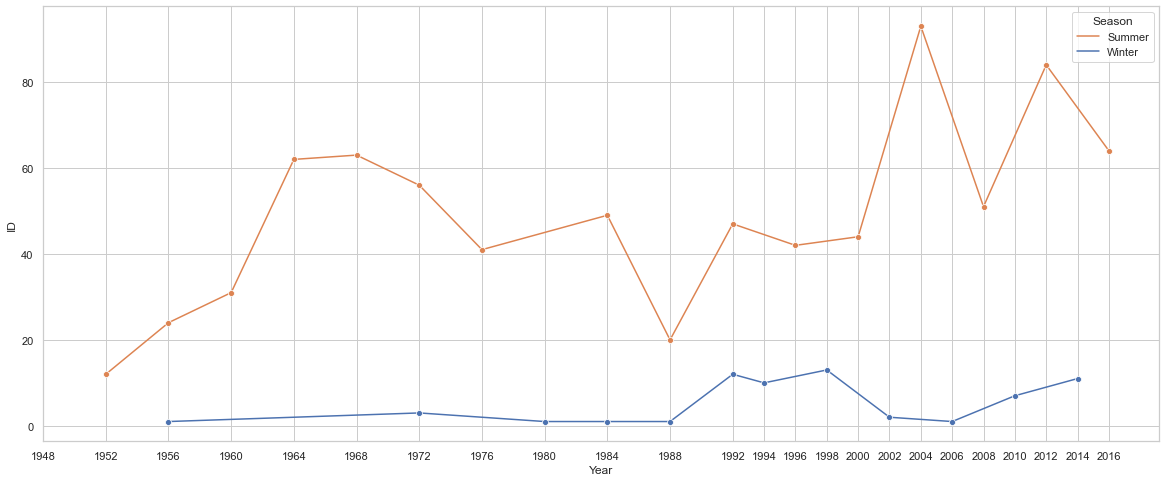

    Year Country         City Summer Winter
29  1968  France     Grenoble      -      X
41  1992  France  Albertville      -    XVI
['FRA']


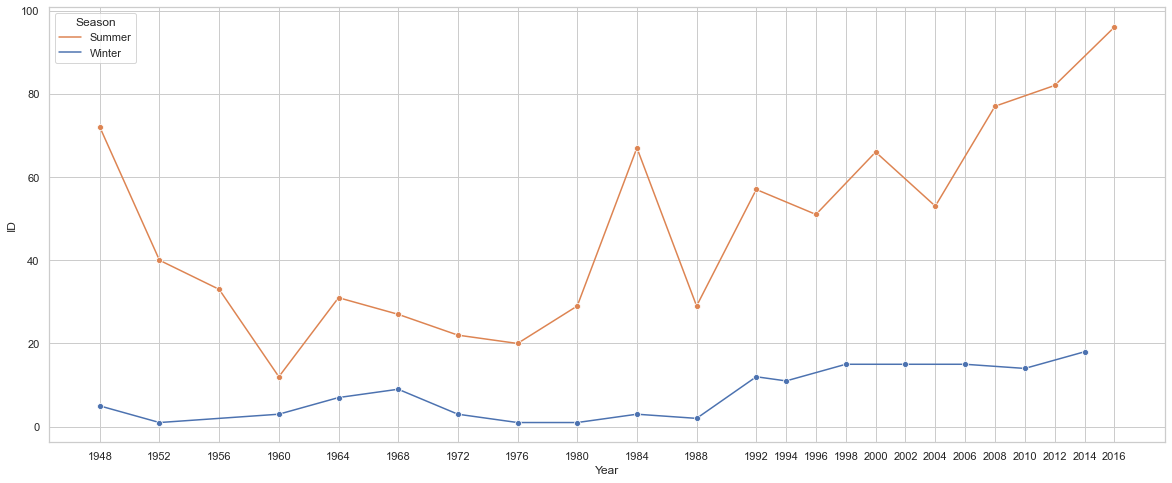

    Year Country         City Summer Winter
30  1968  Mexico  Mexico City    XIX      -
['MEX']


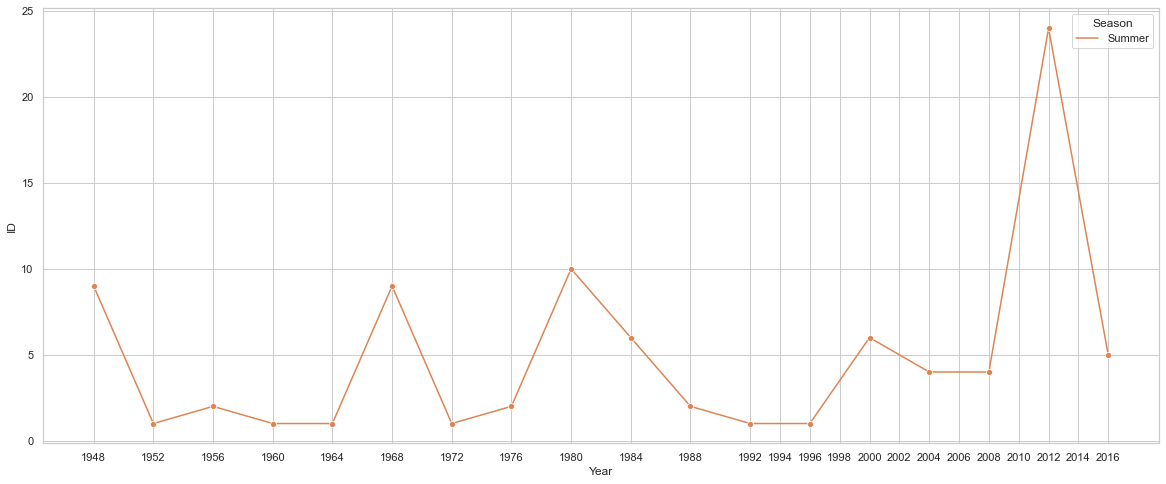

    Year       Country    City Summer Winter
32  1972  West Germany  Munich     XX      -
['FRG']


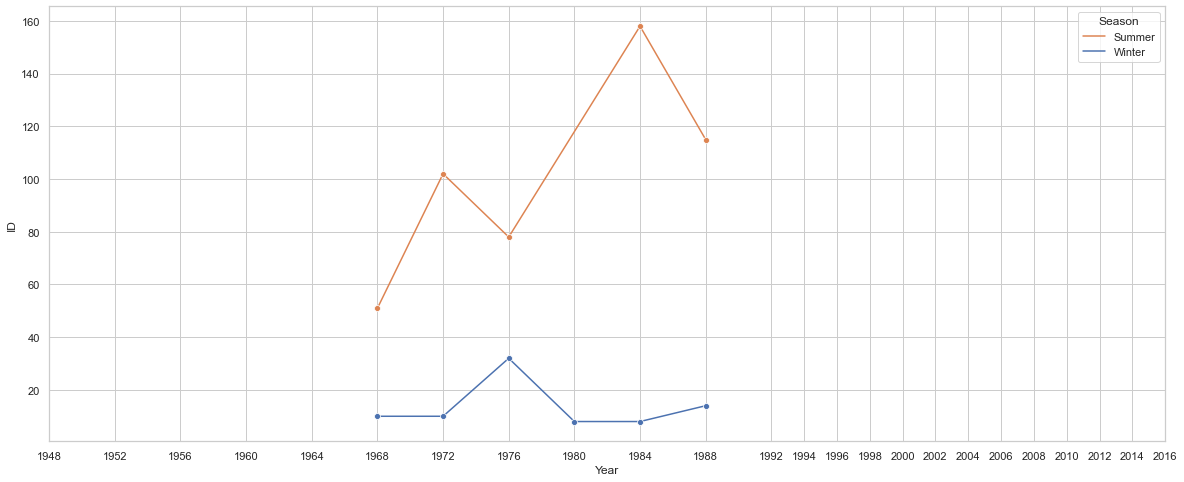

    Year Country       City Summer Winter
34  1976  Canada   Montreal    XXI      -
39  1988  Canada    Calgary      -     XV
51  2010  Canada  Vancouver      -    XXI
['CAN' 'NFL']


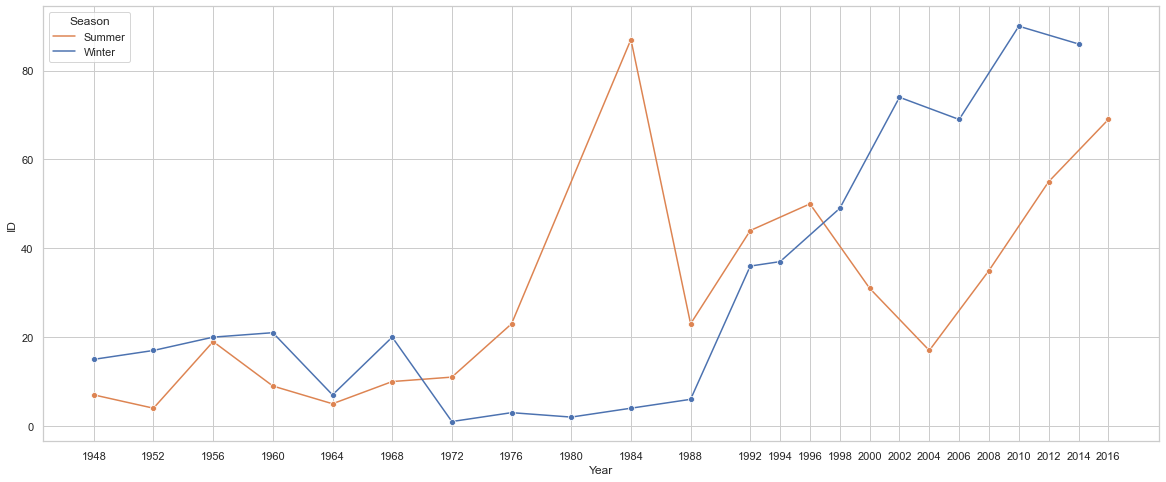

    Year       Country    City Summer Winter
36  1980  Soviet Union  Moscow   XXII      -
['URS']


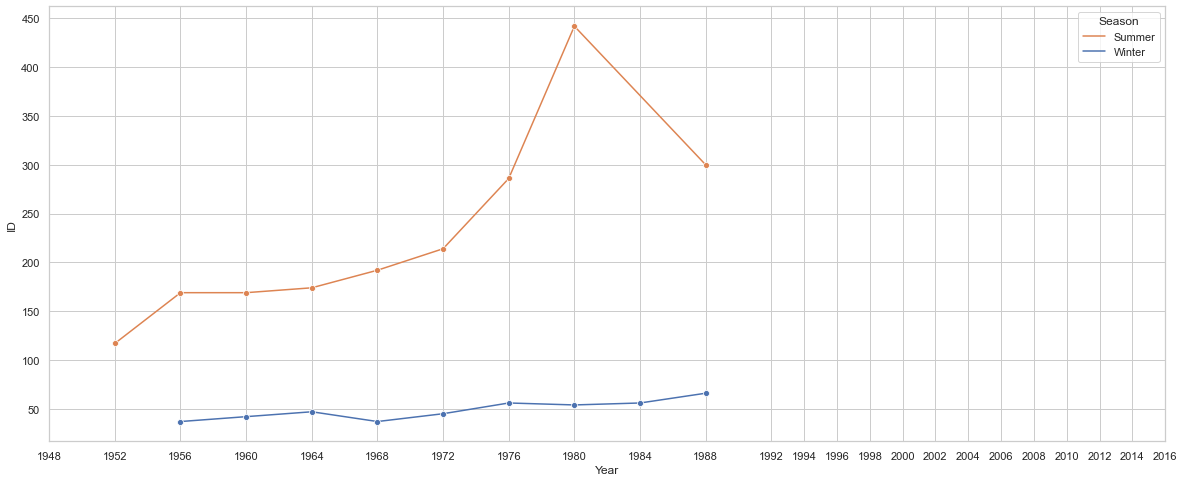

    Year     Country      City Summer Winter
37  1984  Yugoslavia  Sarajevo      -    XIV
['YUG']


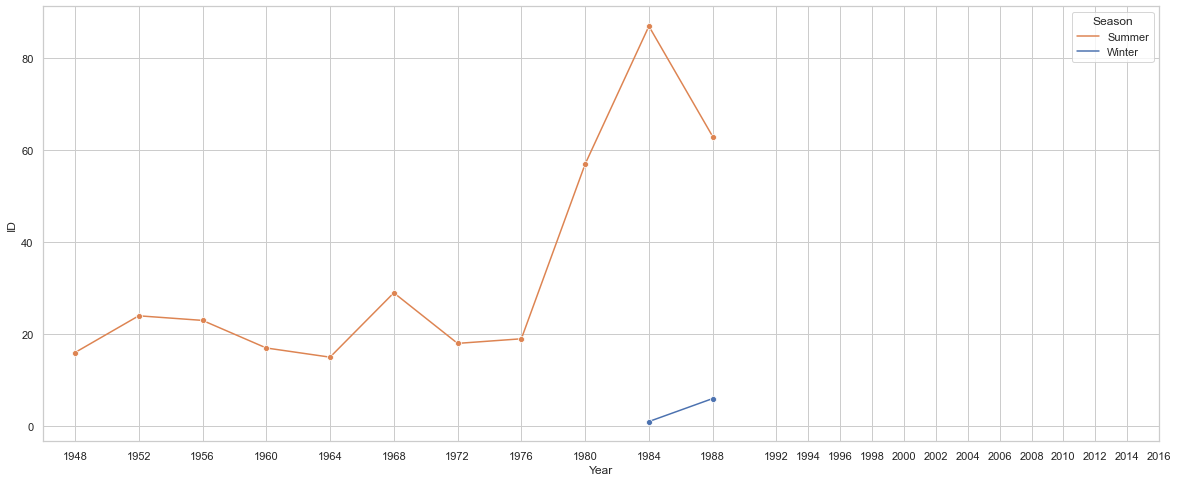

    Year      Country   City Summer Winter
40  1988  South Korea  Seoul   XXIV      -
['KOR']


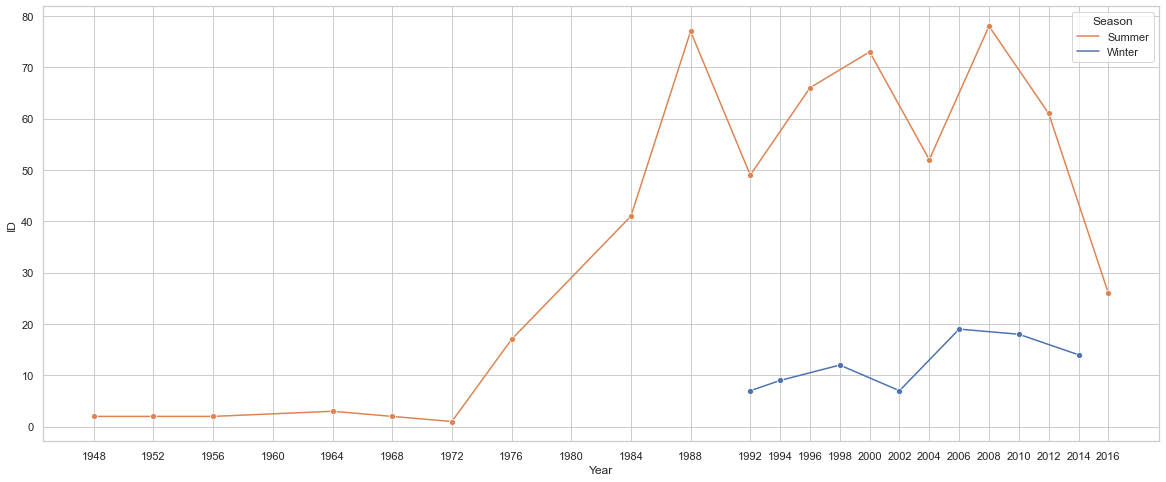

    Year Country       City Summer Winter
42  1992   Spain  Barcelona    XXV      -
['ESP']


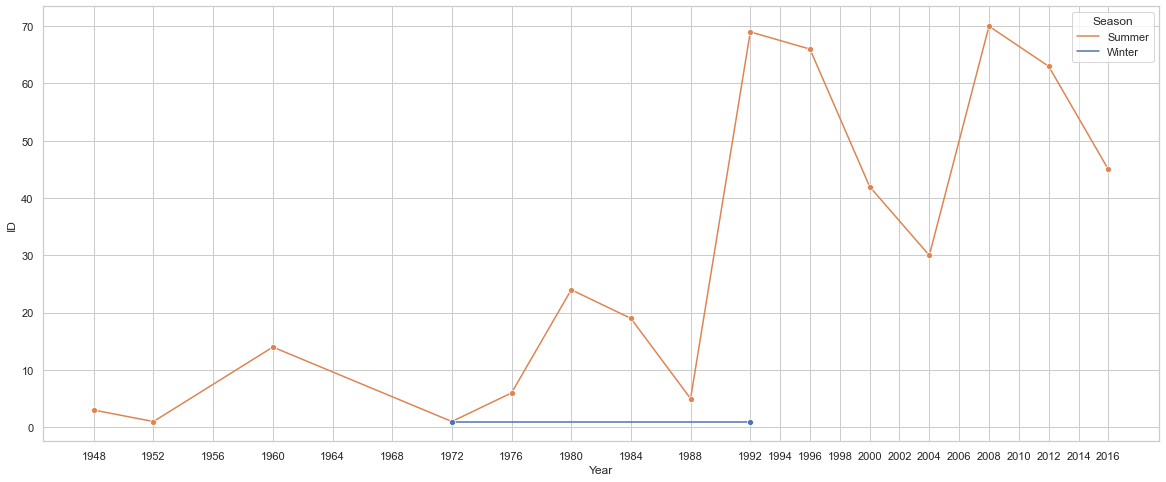

    Year Country    City  Summer Winter
48  2004  Greece  Athens  XXVIII      -
['CRT' 'GRE']


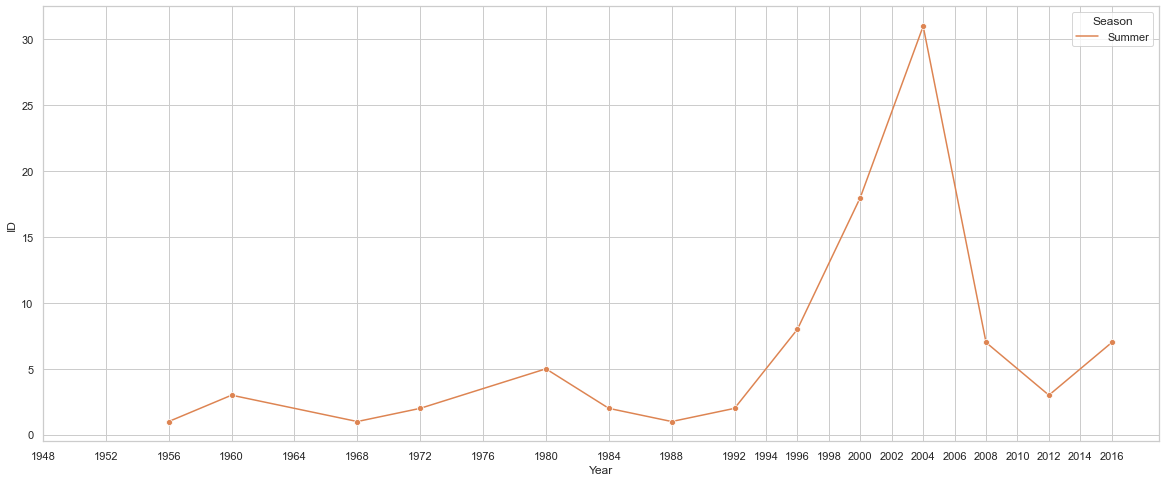

    Year Country     City Summer Winter
50  2008   China  Beijing   XXIX      -
['CHN' 'HKG']


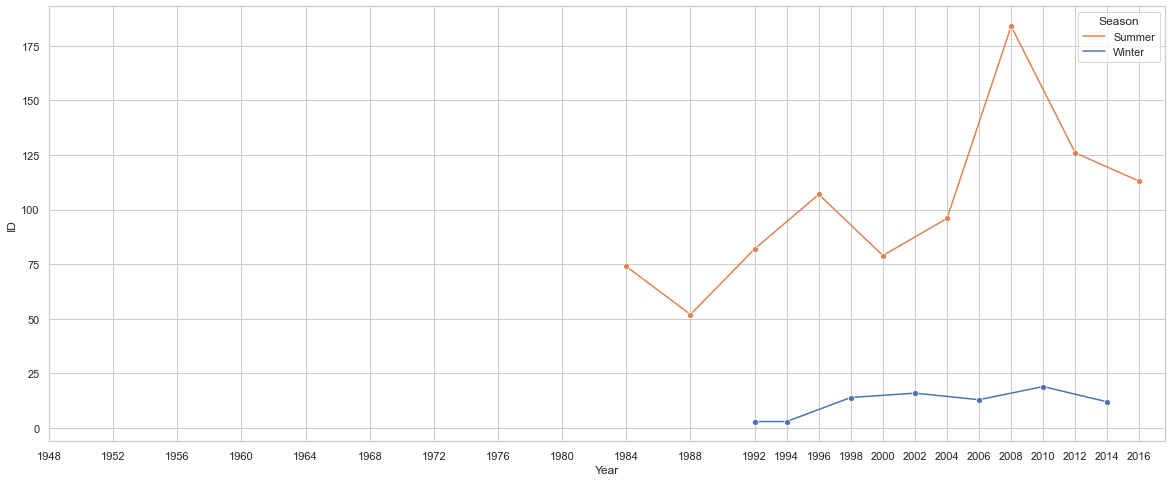

    Year Country   City Summer Winter
53  2014  Russia  Sochi      -   XXII
['EUN' 'RUS']


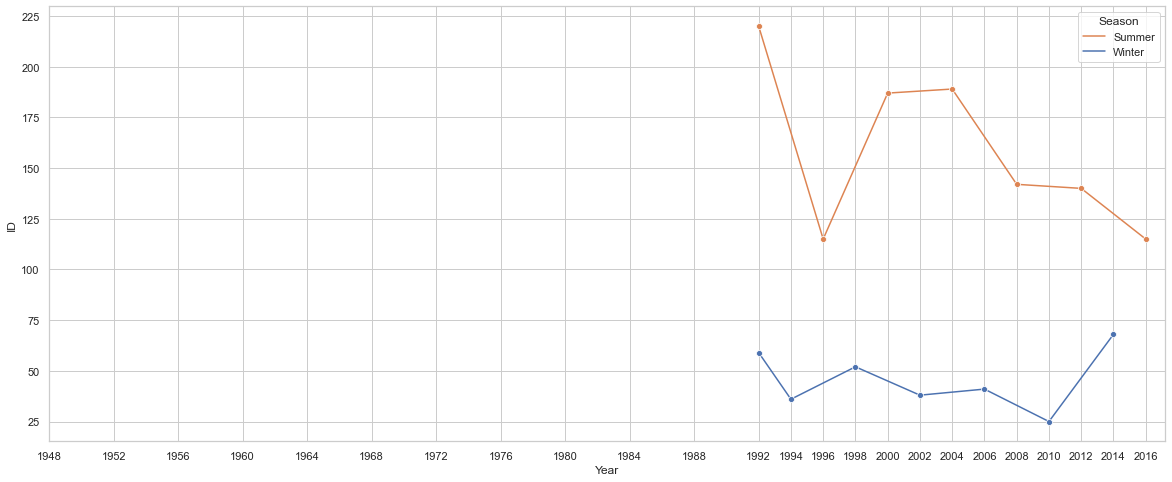

    Year Country            City Summer Winter
54  2016  Brazil  Rio de Janeiro   XXXI      -
['BRA']


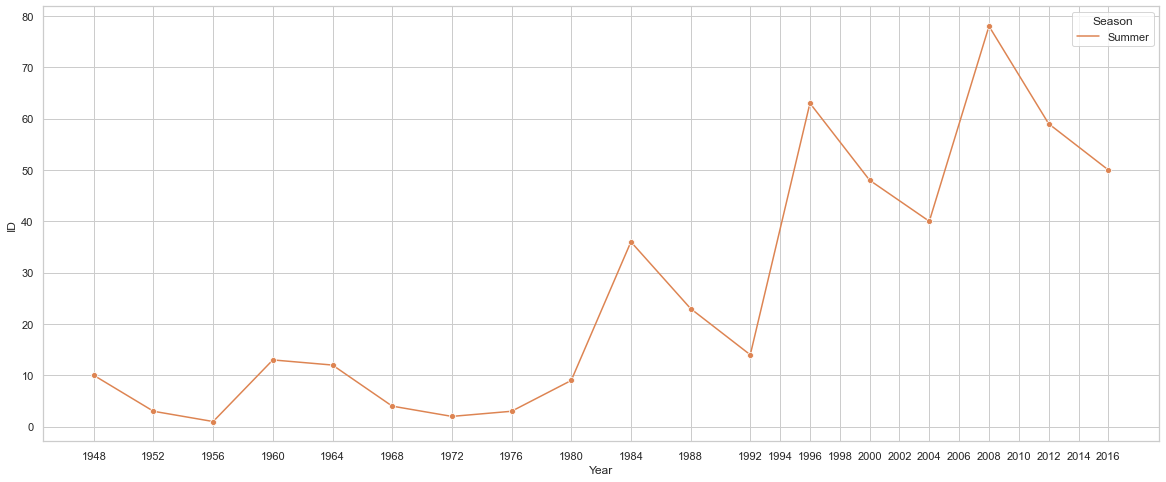

In [196]:
for country in df_hosts['Country'].unique():
    print(df_hosts[df_hosts['Country'] == country][['Year', 'Country', 'City', 'Summer', 'Winter']])
    nocs = df_nocs[df_nocs['region'] == country]['NOC'].unique()
    print(nocs)
    
    df_medals_by_year = df_athletes[df_athletes['NOC'].isin(nocs)].dropna(subset=['Medal']).groupby(['Year', 'Season']).count().reset_index()
    
    g = sns.lineplot(data=df_medals_by_year, x="Year", y="ID", hue="Season", marker='o', palette=season_colors)
    g.set_xticks(df_athletes_by_year['Year'].unique())
    plt.show()

In [197]:
nocs_hosts = df_nocs[df_nocs['region'].isin(df_hosts['Country'].unique())]['NOC'].unique()

In [198]:
df_medals_by_year = df_athletes[df_athletes['NOC'].isin(nocs_hosts)].dropna(subset=['Medal']) \
    .groupby(['Year', 'Season', 'NOC']).count().reset_index()

<AxesSubplot:xlabel='Year', ylabel='ID'>

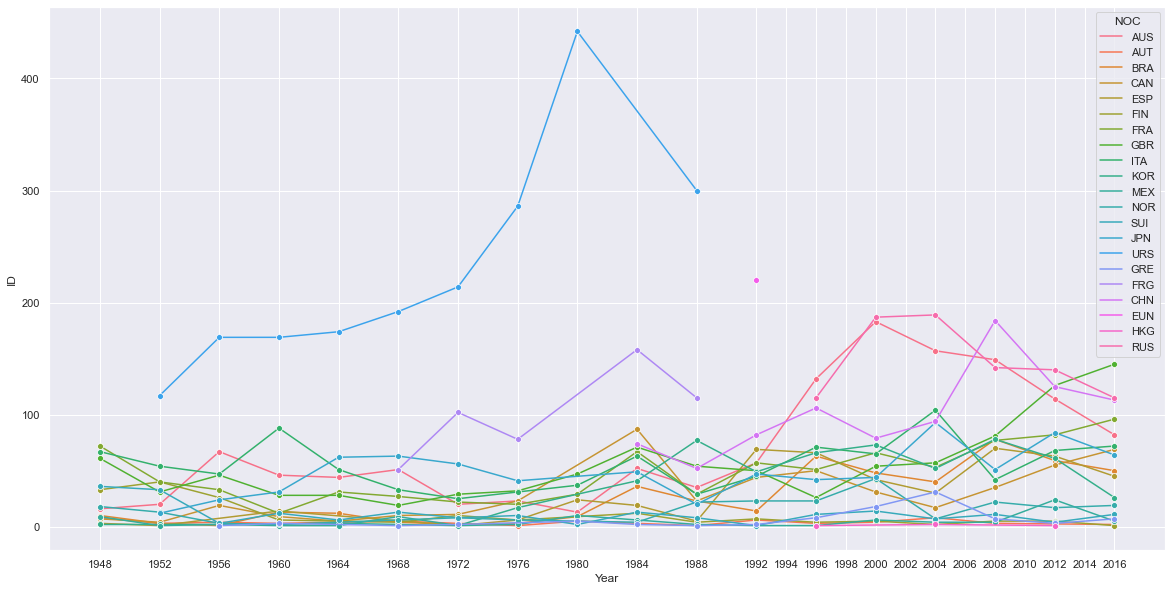

In [170]:
g = sns.lineplot(data=df_medals_by_year[df_medals_by_year['Season'] == 'Summer'], x="Year", y="ID", hue="NOC", marker='o')
g.set_xticks(df_athletes_by_year['Year'].unique())
g

In [171]:
df_hosts

,City,Country,Continent,Summer,Winter,Year,Opening Ceremony,Closing Ceremony
19,St. Moritz,Switzerland,Europe,-,V,1948,January 30,February 8
20,London,United Kingdom,Europe,XIV,-,1948,July 29,August 14
21,Oslo,Norway,Europe,-,VI,1952,February 14,February 25
22,Helsinki,Finland,Europe,XV,-,1952,July 19,August 3
23,Cortina d'Ampezzo,Italy,Europe,-,VII,1956,January 26,February 5
24,Melbourne,Australia,Oceania,XVI,-,1956,November 22,December 8
25,Squaw Valley,United States,North America,-,VIII,1960,February 18,February 28
26,Rome,Italy,Europe,XVII,-,1960,August 25,September 11
27,Innsbruck,Austria,Europe,-,IX,1964,January 29,February 9
28,Tokyo,Japan,Asia,XVIII,-,1964,October 10,October 24


In [130]:
df_athletes.groupby(['Name', 'Year']).count().reset_index()['Name'].value_counts()

Ian Millar                  10
Afanasijs Kuzmins            9
Hubert Raudaschl             9
Durward Randolph Knowles     8
Raimondo D'Inzeo             8
                            ..
Pedro Gonalvo                1
Vesa Tapani Koskela          1
Hwang Bo-Sil                 1
Mara Zamora                  1
Bertil Lennart Sderberg      1
Name: Name, Length: 107042, dtype: int64